In [1]:
# activate cvenv as kernel

In [2]:
# if you are outside of the package you would run: "import ProjectDatasets.CZIDataset"
import czi
import matplotlib.pyplot as plt
import skimage
import numpy as np

In [3]:
skimage.__version__

'0.22.0'

In [4]:
folder = "/mnt/datadisk/FactinMIP"

In [5]:
dataset = czi.CZIDataset(folder=folder)
first_MIP_video, shape, dims = dataset[0]
print(first_MIP_video.shape)

(62, 2048, 612)


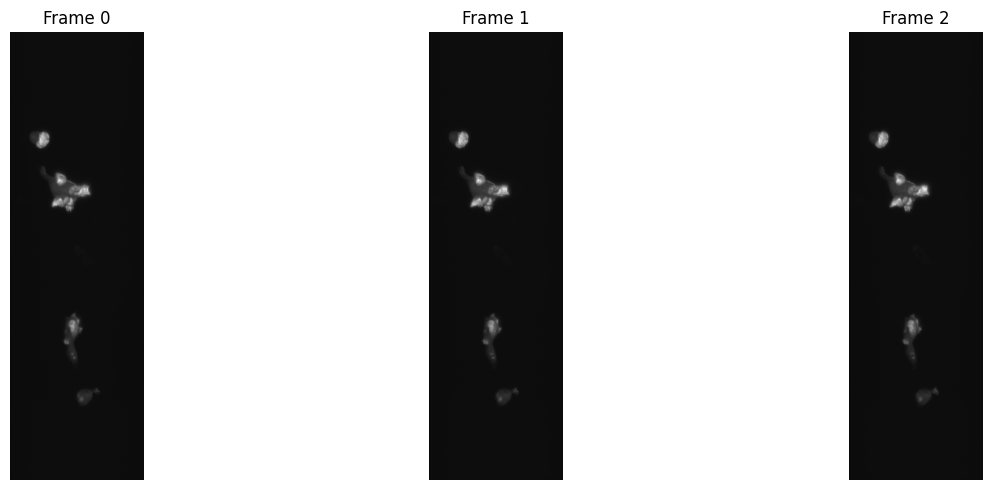

In [6]:
# Parameters
num_frames_to_display = 3  # How many frames you want to display
num_cols = 3  # Number of columns in subplot grid

# Calculate number of rows needed
num_rows = (num_frames_to_display + num_cols - 1) // num_cols  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
axes = axes.flatten()

# Loop through the first few frames
for i in range(min(num_frames_to_display, len(first_MIP_video))):
    ax = axes[i]
    ax.imshow(first_MIP_video[i], cmap='gray')  # Use cmap='gray' for grayscale images
    ax.set_title(f'Frame {i}')
    ax.axis('off')  # Hide axes

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

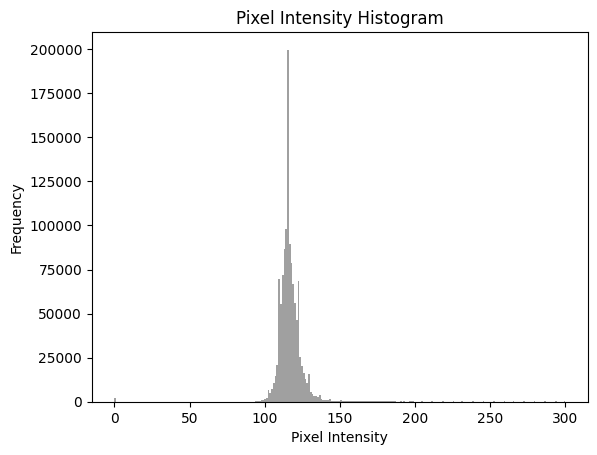

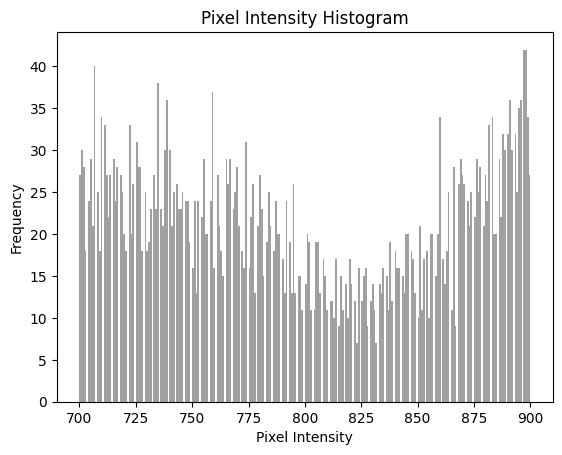

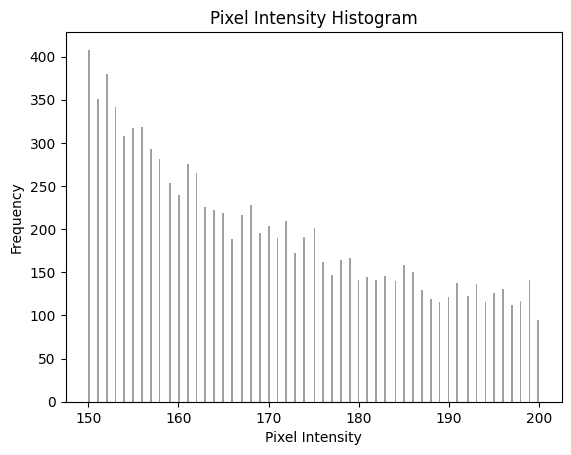

In [7]:
pixel_values = np.array(first_MIP_video[1]).flatten()  # Flatten the 2D array into 1D

# Plot histogram
plt.hist(pixel_values, bins=256, range=(0, 300), color='gray', alpha=0.75)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Plot histogram
plt.hist(pixel_values, bins=256, range=(700, 900), color='gray', alpha=0.75)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

plt.hist(pixel_values, bins=256, range=(150, 200), color='gray', alpha=0.75)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


## Microscope appears to be super sensitive, pick 180 as threshhold arbitrarily

In [8]:
bounding_boxes = czi.Transforms2D.bounding_boxes(first_MIP_video)

(614, 140, 825, 375)
(1283, 242, 1506, 333)
(614, 138, 825, 376)
(1285, 242, 1506, 333)
(615, 140, 825, 375)
(1288, 242, 1507, 334)
(616, 140, 826, 375)
(1292, 241, 1505, 335)
(616, 140, 827, 376)
(1296, 239, 1506, 337)
(617, 140, 828, 377)
(1298, 239, 1507, 338)
(618, 141, 830, 377)
(1303, 240, 1507, 340)
(619, 141, 833, 379)
(1305, 239, 1507, 341)
(620, 143, 835, 381)
(1306, 238, 1507, 341)
(621, 141, 836, 383)
(1306, 239, 1506, 342)
(622, 142, 839, 385)
(1307, 236, 1514, 345)
(624, 143, 841, 385)
(1307, 236, 1515, 346)
(625, 143, 842, 386)
(1308, 235, 1518, 347)
(625, 143, 843, 388)
(1308, 234, 1518, 346)
(626, 144, 847, 387)
(1309, 233, 1520, 347)
(627, 144, 849, 385)
(1309, 233, 1521, 347)
(626, 144, 852, 385)
(1309, 233, 1521, 347)
(628, 144, 853, 385)
(1309, 232, 1521, 348)
(630, 145, 853, 382)
(1309, 231, 1521, 349)
(632, 146, 854, 382)
(1309, 232, 1522, 348)
(633, 146, 857, 369)
(1309, 232, 1520, 350)
(634, 147, 859, 365)
(1309, 233, 1522, 351)
(635, 147, 861, 363)
(1310, 234,

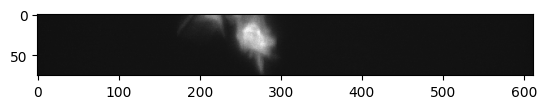

In [9]:
plt.imshow(bounding_boxes[38][0],cmap='gray')